# Learning the Privacy accuracy trade-off

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper')
sns.set_style('ticks')
sns.set_palette('colorblind')

In [2]:
import matplotlib
from matplotlib import rc

# Global figure configurations for consistency
# Do not override manually without a good reason!

matplotlib.rcParams['text.usetex'] = True
#matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'computer modern roman'
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['figure.titlesize'] = 20
matplotlib.rcParams['axes.titlesize'] = 20
matplotlib.rcParams['axes.labelsize'] = 15
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['legend.fontsize'] = 12
matplotlib.rcParams['lines.markersize'] = 15
matplotlib.rcParams['lines.linewidth'] = 5
matplotlib.rcParams['legend.frameon'] = True
matplotlib.rcParams['legend.facecolor'] = 'white'
matplotlib.rcParams['legend.framealpha'] = 0.8

## Introduction

This notebook demonstrates the multiobjective optimization of an analytical function using the hypervolume-based probability of improvement function.

In [3]:
import numpy as np
import psgd

In [19]:
min_l = 0.0001
max_l = 1
min_s = 0.1
max_s = 10

size_grid = 55

l_range = np.geomspace(min_l, max_l, num=size_grid)
s_range = np.geomspace(min_s, max_s, num=size_grid)
# l_range = np.linspace(min_l, max_l, num=size_grid)
# s_range = np.linspace(min_s, max_s, num=size_grid)

In [20]:
# Debugging l and s choices for good epsilon
# # print(np.max(eps))
# # print(eps)
# eps1 = psgd.compute_privacy_with_ranges(l_range, s_range, delta=1e-6)
# # print(eps1)
# _ = plt.hist(eps1)

In [21]:
# # Privacy
# plt.imshow(np.log10(np.exp(eps1)), extent=[l_range[0],l_range[-1],s_range[0],s_range[-1]], interpolation='bilinear', aspect='auto')
# plt.title('$\\log(\\varepsilon)$')
# plt.ylabel('$\\sigma$')
# plt.xlabel('$\\lambda$')
# plt.colorbar()
# #plt.plot(input_matrix[pareto_index][:,0],input_matrix[pareto_index][:,1], 'w*',lw=8,markersize=10, label = 'Pareto inputs')
# plt.xlim((min_l,max_l))
# #plt.legend(loc=3)
# plt.ylim((min_s,max_s))

In [22]:
# print(l_range)
# print(s_range)

In [23]:
## uncoment below to load results if they were written before
scores0 = np.loadtxt(f'grid_{size_grid}_scores0.txt', dtype=float)
eps0 = np.loadtxt(f'grid_{size_grid}_eps0.txt', dtype=float)
input_matrix = np.loadtxt(f'grid_{size_grid}_input_matrix.txt', dtype=float)
scores_output = np.loadtxt(f'grid_{size_grid}_scores_output.txt', dtype=float)
eps_output = np.loadtxt(f'grid_{size_grid}_eps_output.txt', dtype=float)

In [24]:
## ground truth
## skip if you've read the results from files in the cell above
#scores0, eps0, input_matrix, scores_output, eps_output = psgd.compute_outputs_with_ranges(l_range, s_range, R=50)

In [25]:
# np.savetxt(f'grid_{size_grid}_scores0.txt', scores0)
# np.savetxt(f'grid_{size_grid}_eps0.txt', eps0)
# np.savetxt(f'grid_{size_grid}_input_matrix.txt', input_matrix)
# np.savetxt(f'grid_{size_grid}_scores_output.txt', scores_output)
# np.savetxt(f'grid_{size_grid}_eps_output.txt', eps_output)

In [26]:
scores = 1 - scores0
eps = np.exp(eps0)

In [27]:
data_pareto = np.vstack((scores.flatten(), eps.flatten())).T
y_pareto_data, x_pareto_data, pareto_index = psgd.get_pareto_points(data_pareto)

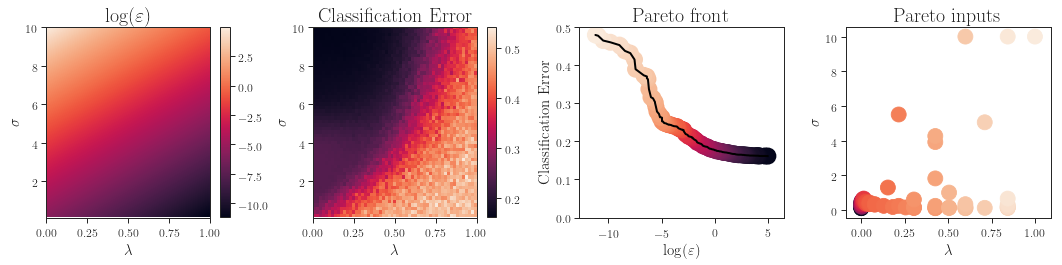

In [28]:
single_row = True

if single_row:
    plt.figure(figsize=(18,3.5))
    grid = plt.GridSpec(1, 4, wspace=.3)
    positions = iter([grid[0,0], grid[0,1], grid[0,2], grid[0,3]])
else:
    plt.figure(figsize=(10,10))
    grid = plt.GridSpec(2, 2, wspace=.25, hspace=0.3)
    positions = iter([grid[0,0], grid[0,1], grid[1,0], grid[1,1]])

# Privacy
plt.subplot(next(positions))
plt.imshow(np.log(eps), extent=[l_range[0],l_range[-1],s_range[0],s_range[-1]], interpolation='bilinear', aspect='auto')
plt.title('$\\log(\\varepsilon)$')
plt.ylabel('$\\sigma$')
plt.xlabel('$\\lambda$')
plt.colorbar()
#plt.plot(input_matrix[pareto_index][:,0],input_matrix[pareto_index][:,1], 'w*',lw=8,markersize=10, label = 'Pareto inputs')
plt.xlim((min_l,max_l))
#plt.legend(loc=3)
plt.ylim((min_s,max_s))

# Utility
plt.subplot(next(positions))
plt.imshow(scores, extent=[l_range[0],l_range[-1],s_range[0],s_range[-1]], aspect='auto')#, interpolation='bilinear')
plt.title('Classification Error')
plt.ylabel('$\\sigma$')
plt.xlabel('$\\lambda$')

plt.xlim((min_l,max_l))
plt.colorbar()
#plt.legend(loc=3)
plt.ylim((min_s,max_s))


# True pareto
plt.subplot(next(positions))
# plt.plot(x_pareto_data, y_pareto_data, 'k-',lw=2, label = 'Empirical Pareto Front')
# plt.scatter(x_pareto_data, y_pareto_data,linewidths=2) #,c = 1*input_matrix[pareto_index][:,0])
plt.plot(np.log(x_pareto_data), y_pareto_data, 'k-',lw=2, label = 'Empirical Pareto Front')
plt.scatter(np.log(x_pareto_data), y_pareto_data,linewidths=2, c = pareto_index.argsort())
plt.title('Pareto front')
plt.xlabel('$\\log(\\varepsilon)$')
plt.ylabel('Classification Error')
#plt.xlim((-0.1,50))
plt.ylim((0,0.5))


plt.subplot(next(positions))
plt.title('Pareto inputs')
#plt.ylabel('s',size = AXIS_SIZE)
#plt.xlabel('l',size = AXIS_SIZE)
#plt.scatter(input_matrix[pareto_index][:,0],input_matrix[pareto_index][:,1], label = 'Pareto inputs') #,c = 1*input_matrix[pareto_index][:,0])
#plt.xlim((min_l,max_l))
#plt.ylim((min_s,max_s))
# plt.scatter(np.log(input_matrix[pareto_index][:,0]),np.log(input_matrix[pareto_index][:,1]), label = 'Pareto inputs') #,c = 1*input_matrix[pareto_index][:,0])
plt.scatter(input_matrix[pareto_index][:,0],input_matrix[pareto_index][:,1], label = 'Pareto inputs',c = pareto_index.argsort())
# plt.xlim((np.log(min_l),np.log(max_l)))
# plt.ylim((np.log(min_s),np.log(max_s)))
plt.ylabel('$\\sigma$')
plt.xlabel('$\\lambda$')
#plt.colorbar()
#plt.legend(loc=3)

plt.savefig('psgd_exact.pdf', bbox_inches='tight')

In [ ]:
#import GPyOpt
import gpflow
import gpflowopt

In [ ]:
# Setup input domain
domain = gpflowopt.domain.ContinuousParameter('L', min_l, max_l) + \
         gpflowopt.domain.ContinuousParameter('S', min_s, max_s)

In [ ]:
num_samples = 250

np.random.seed(12)
idx = np.random.randint(len(scores_output), size=num_samples) 

X = input_matrix[idx,:]
Y_eps = eps_output[idx,:]
Y_scores = scores_output[idx,:]
Y = np.hstack((Y_scores,Y_eps))

In [ ]:
x_pareto_data_empirical, y_pareto_data_empirical, pareto_index = psgd.get_pareto_points(Y)

In [ ]:
# Training the models
objective_models = [gpflow.gpr.GPR(X.copy(), Y[:,[i]].copy(), gpflow.kernels.Matern52(2, ARD=False)) for i in range(Y.shape[1])]
for model in objective_models:
    model.likelihood.variance = 0.1
    model.optimize()

hvpoi = gpflowopt.acquisition.HVProbabilityOfImprovement(objective_models)

In [ ]:
## We make the predictions with the models

scores_predicted, eps_predicted, _, _, _ = psgd.predict_outputs_with_ranges(l_range, s_range, objective_models[0], objective_models[1] )

## evaluate the hhvpoi in the grid
hvpoi_matrix = np.zeros((len(l_range), len(s_range)))
input_matrix  = np.zeros((len(l_range)*len(s_range),2))

for i in range(len(l_range)):
    for j in range(len(s_range)):
        ## input 
        index = i*len(s_range)+ j
        input_matrix[index,0] =  l_range[i]
        input_matrix[index,1] =  s_range[j]      
        hvpoi_matrix[i,j] = hvpoi.evaluate(input_matrix[index,None])[0,0]


In [ ]:
single_row = True

if single_row:
    plt.figure(figsize=(18,3.5))
    grid = plt.GridSpec(1, 4, wspace=.3)
    positions = iter([grid[0,0], grid[0,1], grid[0,2], grid[0,3]])
else:
    plt.figure(figsize=(10,10))
    grid = plt.GridSpec(2, 2, wspace=.25, hspace=0.3)
    positions = iter([grid[0,0], grid[0,1], grid[1,0], grid[1,1]])

# Privacy
plt.subplot(next(positions))
plt.imshow(eps_predicted, extent=[l_range[0],l_range[-1],s_range[0],s_range[-1]], interpolation='bilinear', aspect='auto')
plt.title('Predicted epsilon')
plt.ylabel('s')
plt.xlabel('l')
plt.plot(X[:,0],X[:,1],'w.',markersize=10,label = 'Observations')
plt.colorbar()
plt.xlim((min_l,max_l))
plt.ylim((min_s,max_s))
plt.legend()

# Utility
plt.subplot(next(positions))
plt.imshow(scores_predicted, extent=[l_range[0],l_range[-1],s_range[0],s_range[-1]], interpolation='bilinear', aspect='auto')
plt.plot(X[:,0],X[:,1],'w.',markersize=10,label = 'Observations')

plt.title('Predicted utility')
plt.ylabel('s')
plt.xlabel('l')
plt.colorbar()
plt.xlim((min_l,max_l))
plt.ylim((min_s,max_s))
plt.legend()

# True pareto
plt.subplot(next(positions))
plt.plot(x_pareto_data, y_pareto_data, 'r--',lw=3, label = 'True Pareto')
plt.plot(x_pareto_data_empirical, y_pareto_data_empirical, 'k-', label = 'Empirical')
plt.fill_between(x_pareto_data_empirical,0,y_pareto_data_empirical ,facecolor='black', alpha=0.1,label='Non dominated set')
plt.plot(Y[:,0],Y[:,1],'b.', label = 'Observation outputs',markersize=10)
plt.title('Pareto front')
plt.xlabel('Utility')
plt.ylabel('Epsilon')
plt.xlim((min_l,max_l))
plt.ylim((min_s,max_s))
plt.legend(loc=3)
plt.savefig('psgd_exact.pdf', bbox_inches='tight')


# Utility
plt.subplot(next(positions))
plt.imshow(hvpoi_matrix, extent=[l_range[0],l_range[-1],s_range[0],s_range[-1]], interpolation='bilinear', aspect='auto')

plt.title('HVPoI')
plt.ylabel('s')
plt.xlabel('l')
plt.colorbar()
plt.xlim((min_l,max_l))
plt.ylim((min_s,max_s))
plt.plot(np.array([13]),np.array([17.5]),'rx',markersize=10, lw=5, label = 'Next location')
plt.legend(loc=3)

plt.savefig('psgd_predictions.pdf', bbox_inches='tight')